In [129]:
# Haoyang Chen
# hc2812
# Assingment 1

import numpy as np
import scipy as sp
from scipy.stats import t
import pandas as pd
from matplotlib import pyplot as plt

In [177]:
%matplotlib inline

In [130]:
path = 'hw1_data_csv/'
# Training data
xtrn =pd.read_csv(path+'Xtrain.csv', header=None)
ytrn =list(pd.read_csv(path+'ytrain.csv', header=None)[0])
xtrn['y'] = ytrn

# Reading test data
xtst =pd.read_csv(path+'Xtest.csv', header=None)
ytst =list(pd.read_csv(path+'ytest.csv', header=None)[0])

In [156]:
class NaiveBayesClassifier(object):
    def __init__(self, parameters):
        self.parameters = parameters

    def posterior_predictive_distribution_y(self, y, y_new):
        e, f = self.parameters[3:5]
        if y_new == 1:
            return (e + sum(y)) / float(len(y) + e + f)
        else:
            return (f + len(y) - sum(y)) / float(len(y) + e + f)

    def posterior_predictive_distribution_x(self, x, y, x_new, y_new):
        a, b, c = self.parameters[0:3]
        if y_new == 0:
            posteriorX = 1
            for feature_index in range(15):
                x_train = list(x[x['y'] == 0][feature_index])
                x_star = x_new[feature_index]
                miu_star = sum(x_train) / float(len(x_train) + 1 / a)
                alpha = b + float(len(x_train) / 2)
                beta = c + 0.5 * (
                len(x_train) * np.var(x_train) + len(x_train) * ((sp.mean(x_train)) ** 2) / float(1 + len(x_train)))
                N_star = 1 / float(len(x_train) + 1 / a)
                    #                 df = 2 * alpha
                    #                 loc = miu_star
                    #                 scale = alpha / (beta * (N_star + 1))
                value = (sp.special.gamma(0.5) / sp.special.beta(alpha, 0.5)) * sp.sqrt(
                        alpha / (beta * (N_star + 1)) / (sp.pi * 2 * alpha)) * sp.power(
                        1 + ((alpha / (beta * (N_star + 1))) * ((x_star - miu_star) ** 2)) / (2 * alpha), - alpha - 0.5)
                    #                 value = t.pdf(x=x_star, df=df, loc=loc, scale=scale)
                posteriorX = posteriorX * value

        else:
            posteriorX = 1
            for feature_index in range(15):
                x_train = list(x[x['y'] == 1][feature_index])
                x_star = x_new[feature_index]
                miu_star = sum(x_train) / (len(x_train) + 1 / a)
                alpha = b + len(x_train) / 2
                beta = c + 0.5 * (
                len(x_train) * np.var(x_train) + len(x_train) * ((sp.mean(x_train)) ** 2) / (1 + len(x_train)))
                N_star = 1 / float(len(x_train) + 1 / a)
                value = (sp.special.gamma(0.5) / sp.special.beta(alpha, 0.5)) * sp.sqrt(
                        alpha / (beta * (N_star + 1)) / (sp.pi * 2 * alpha)) * sp.power(
                        1 + ((alpha / (beta * (N_star + 1))) * ((x_star - miu_star) ** 2)) / (2 * alpha), - alpha - 0.5)
                    #                 df = 2 * alpha
                    #                 loc = miu_star
                    #                 scale = alpha / (beta * (N_star + 1))
                    #                 value = t.pdf(x=x_star, df=df, loc=loc, scale=scale)
                posteriorX = posteriorX * value
        return float(posteriorX)



    def fit(self, x, y, x_new):
        x_test = map(list, x_new.values)
        y_test = []
        logit = []
        for x_predict in x_test:
            posterior_y_0 = float(self.posterior_predictive_distribution_x(x, y, x_predict,
                                                                     0)) * self.posterior_predictive_distribution_y(y, 0)
            posterior_y_1 = float(self.posterior_predictive_distribution_x(x, y, x_predict,
                                                                     1)) * self.posterior_predictive_distribution_y(y, 1)
            if posterior_y_0 >= posterior_y_1:
                y_test.append(0)
            else:
                y_test.append(1)
            logit.append(posterior_y_0 / posterior_y_1)
        return y_test, logit


In [157]:
parameters = [1, 1, 1, 1, 1]
classifier = NaiveBayesClassifier(parameters)

In [158]:
y_test, logit = classifier.fit(x=xtrn, y=ytrn, x_new=xtst)

In [159]:
def cross_table(y, y_hat):
    count_0_0 = 0
    count_0_1 = 0
    count_1_0 = 0
    count_1_1 = 0
    for i in range(len(y)):
        if (y[i] == 1) & (y_hat[i] == 1):
            count_1_1 += 1
        elif (y[i] == 0) & (y_hat[i] == 1):
            count_0_1 += 1
        elif (y[i] ==  1) & (y_hat[i] == 0):
            count_1_0 += 1
        elif (y[i] ==  0) & (y_hat[i] == 0):
            count_0_0 += 1
        
    print count_0_0, count_0_1, count_1_0, count_1_1

In [160]:
cross_table(ytst, y_test)

930 52 82 927


In [176]:
def ImageDrawer(Q, vector):
    vector = vector.values.reshape(15)
    x2 = np.dot(Q, vector).reshape((28,28))
    plt.imshow(x2, interpolation='nearest')

In [174]:
Q = pd.read_csv(path+"Q.csv", header=None)

In [180]:
# 3 misclassified images
misclassfied_index = [i for i in range(len(y_test)) if y_test[i] != ytst[i]]

In [181]:
misclassfied_index

[40,
 42,
 55,
 64,
 74,
 80,
 84,
 138,
 140,
 142,
 162,
 163,
 165,
 183,
 195,
 221,
 223,
 231,
 259,
 263,
 269,
 301,
 312,
 340,
 359,
 360,
 361,
 363,
 396,
 420,
 440,
 452,
 464,
 465,
 483,
 486,
 489,
 529,
 564,
 592,
 603,
 676,
 696,
 698,
 730,
 740,
 744,
 809,
 842,
 909,
 948,
 974,
 982,
 1002,
 1033,
 1047,
 1053,
 1074,
 1094,
 1108,
 1117,
 1149,
 1154,
 1168,
 1181,
 1193,
 1201,
 1215,
 1227,
 1253,
 1316,
 1327,
 1342,
 1364,
 1370,
 1373,
 1382,
 1390,
 1392,
 1407,
 1410,
 1412,
 1423,
 1429,
 1435,
 1445,
 1446,
 1450,
 1463,
 1475,
 1482,
 1502,
 1504,
 1505,
 1516,
 1519,
 1567,
 1571,
 1647,
 1653,
 1658,
 1661,
 1662,
 1663,
 1669,
 1671,
 1672,
 1673,
 1674,
 1678,
 1680,
 1681,
 1707,
 1708,
 1743,
 1757,
 1758,
 1818,
 1837,
 1842,
 1901,
 1902,
 1919,
 1922,
 1924,
 1926,
 1958,
 1971,
 1972,
 1977,
 1981,
 1982,
 1983,
 1986]

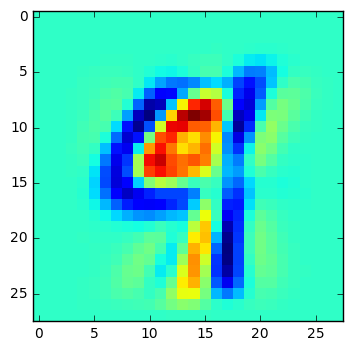

In [195]:
ImageDrawer(Q, xtst.iloc[223])

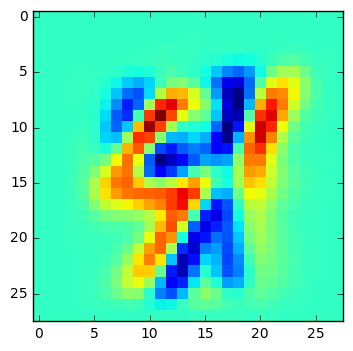

In [196]:
ImageDrawer(Q, xtst.iloc[676])

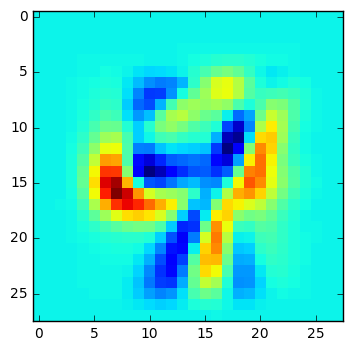

In [197]:
ImageDrawer(Q, xtst.iloc[1842])

In [193]:
print y_test[223], y_test[676], y_test[1842]
print ytst[223], ytst[676], ytst[1842]
print logit[223], logit[676], logit[1842]

1 1 0
0 0 1
0.639793214237 0.926222661075 1.79610067819


In [207]:
# 3 most ambiguous images


In [213]:
logit_cp = logit[:]

In [215]:
logit_abs = [abs(item - 1) for item in logit_cp]

In [217]:
sorted_logit = sorted(logit_abs)

In [219]:
# 3 most ambiguous images
print logit_abs.index(sorted_logit[0])
print logit_abs.index(sorted_logit[1])
print logit_abs.index(sorted_logit[2])

822
1130
357


In [221]:
print y_test[822], y_test[1130], y_test[357]
print ytst[822], ytst[1130], ytst[357]
print logit[822], logit[1130], logit[357]

0 1 0
0 1 0
1.00118731725 0.990875806066 1.01456469643


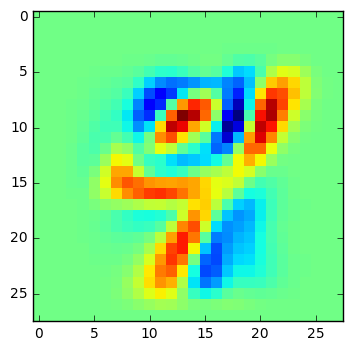

In [225]:
ImageDrawer(Q, xtst.iloc[822])

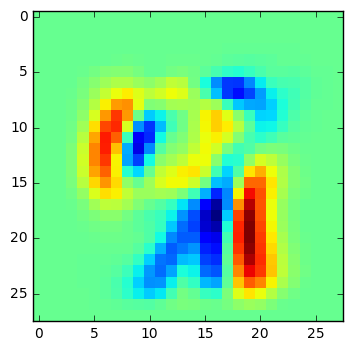

In [226]:
ImageDrawer(Q, xtst.iloc[1130])

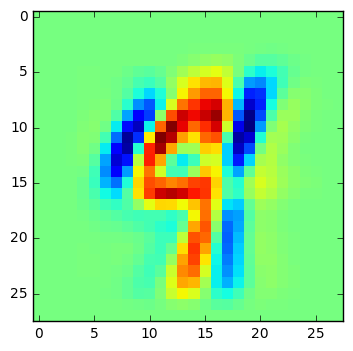

In [227]:
ImageDrawer(Q, xtst.iloc[357])

In [6]:
y = [0, 0, 1, 0, 0, 1, 0, 0]

In [13]:
[i for i in range(8) if y[i] == 1]

[2, 5]

In [9]:
for i, j in enumerate(y):

0
0
1
0
0
1
0
0
